In [30]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')
import function
from sklearn.preprocessing import MinMaxScaler

In [31]:
df = pd.read_excel('../VisitorEntrancesV3.xlsx')

In [32]:
df = df[df.Site_Name=='The Masada']
df = function.remove_unique_one(df)
df = df.drop(df.filter(regex='Season').columns, axis=1)
df = df.drop(df.filter(regex='Exceeded').columns, axis=1)
df = df.drop(df.filter(regex='isHeatwave').columns, axis=1)
df = df.replace({True:1,False:0})

In [33]:
dfWithoutLastYearVisits = df.drop('last_year_visitors',axis=1)
dfLastYearVisits = df.dropna()

In [34]:
print(dfLastYearVisits.shape)
print(dfWithoutLastYearVisits.shape)

(1011, 8)
(1387, 7)


In [35]:
def mlrModelResTrainTestCoeff(dataframe,shaffle=False):
    dataframe.dropna(inplace=True)
    dataframe.sort_values('Date')
    y = dataframe[['Date','Israelis_Count']]
    X = dataframe.drop('Israelis_Count',axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=shaffle, test_size = 0.2, random_state=312148513)

    X_train_scaler = MinMaxScaler()
    X_test_scaler = MinMaxScaler()

    X_train_scaled = X_train_scaler.fit_transform(X_train.drop('Date',axis=1))
    X_test_scaled = X_test_scaler.fit_transform(X_test.drop('Date',axis=1))
    
    mlr = linear_model.LinearRegression()
    mlr.fit(X_train_scaled,y_train.Israelis_Count)
    
    prediction = mlr.predict(X_train_scaled)
    resTrain =  pd.DataFrame(
        data={
            'Prediction':prediction,
            'Actual': y_train.Israelis_Count.values    },
        index=y_train.Date
    )
    
    prediction = mlr.predict(X_test_scaled)
    resTest = pd.DataFrame(
        data={
            'Prediction':prediction,
            'Actual': y_test.Israelis_Count.values    },
        index=y_test.Date
    )
    coef = sorted( list(zip(np.round(mlr.coef_,5).T,X_train.drop("Date",axis=1).columns)))
    d = {}
    for tup in coef:
        d[tup[-1]] = tup[0]
    coefDF = pd.DataFrame.from_dict(d,orient='index')
    
    return resTrain,resTest,coefDF
    
def printRes(res ,plotLine=True ,plotResiduals = False):
    res = res.sort_index()
    print('rmse',function.get_rmse(res.Prediction, res.Actual))
    print('std',np.std(res.Actual))
    
    if plotResiduals:
        function.plot_residuals(actual=y_train.Israelis_Count,prediction=prediction)
    if plotLine:
        function.plot_line(actual=res.Actual,prediction=res.Prediction)
        
    print('Sample rows:')
    print( res.sample(10))

In [36]:
resTrain,resTest,coeffDf = mlrModelResTrainTestCoeff(dfLastYearVisits)

C:\Users\Avivsa\AppData\Local\Temp\ipykernel_17868\1564167282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.dropna(inplace=True)


                             0
Temperature         -488.41952
IsVacation          -435.53464
is_weekend          -127.55243
pm10                  64.07809
IsHoliday            177.73131
last_year_visitors  1491.36468

rmse 691.0328710086147
std 809.1665472718446


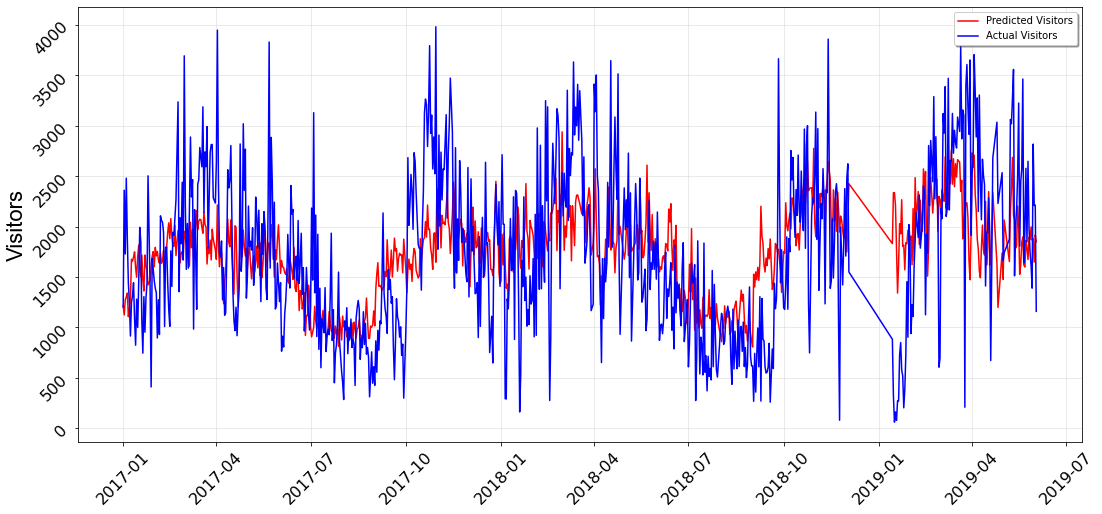

Sample rows:
             Prediction  Actual
Date                           
2018-10-13  1810.671765    2367
2019-03-20  2638.448589    2944
2017-03-23  1629.070664    2992
2019-02-28  2300.156228     606
2017-04-09  1469.424434    1121
2018-01-10  1907.083045    2080
2018-09-05  1473.582754     727
2017-08-29  1003.675446     758
2017-03-27  1670.060359    2813
2017-07-21   966.914297    1935

rmse 642.6634061847436
std 782.933047432456


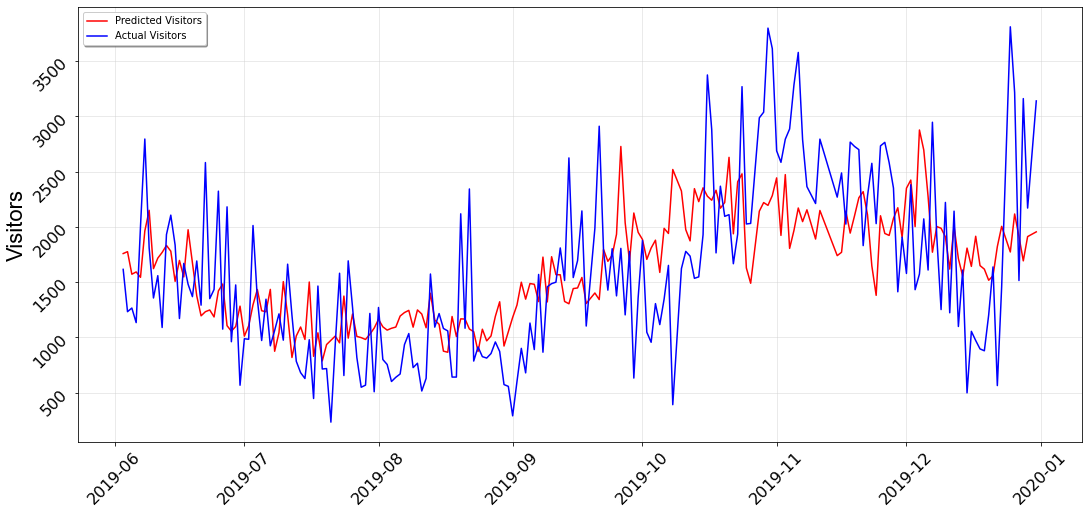

Sample rows:
             Prediction  Actual
Date                           
2019-07-28   997.109123     548
2019-10-08  2519.088642     390
2019-12-10  1909.423552    2221
2019-09-26  2727.563285    1805
2019-08-16   874.800326    1080
2019-12-12  2005.694179    2142
2019-11-05  1966.907717    3284
2019-09-22  1795.162754    1785
2019-06-27  1105.145922    2181
2019-07-10  1504.158578     974


In [37]:
print(coeffDf)
print()

printRes(resTrain)
print()

printRes(resTest)

In [38]:
resTrain,resTest,coeffDf = mlrModelResTrainTestCoeff(dfEnGediWithoutLastYearVisits)
print(coeffDf)
print()

printRes(resTrain)
print()

printRes(resTest)

NameError: name 'dfEnGediWithoutLastYearVisits' is not defined